## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.949074  0.388420  1.369128 -0.074281 -1.413181  0.763535
1 -1.036587 -1.030705  0.047396  0.321697 -0.600896 -1.059889
2  1.456606  1.090396  0.330935 -0.896446 -1.442305 -1.207931
3 -1.356830 -1.574169  1.375541 -1.295440 -0.663124 -1.573342
4  0.359548 -0.478585 -0.233845  1.789379  1.034760  1.251873


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0542479	total: 69.6ms	remaining: 1m 9s
1:	learn: 1.0402780	total: 70.1ms	remaining: 35s
2:	learn: 1.0288877	total: 70.8ms	remaining: 23.5s
3:	learn: 1.0178831	total: 71.3ms	remaining: 17.7s
4:	learn: 1.0092435	total: 71.8ms	remaining: 14.3s
5:	learn: 0.9972606	total: 72.4ms	remaining: 12s
6:	learn: 0.9871145	total: 72.9ms	remaining: 10.3s
7:	learn: 0.9761815	total: 73.5ms	remaining: 9.11s
8:	learn: 0.9666536	total: 73.9ms	remaining: 8.14s
9:	learn: 0.9558721	total: 74.5ms	remaining: 7.38s
10:	learn: 0.9458667	total: 75.1ms	remaining: 6.75s
11:	learn: 0.9342524	total: 75.6ms	remaining: 6.22s
12:	learn: 0.9231929	total: 76.1ms	remaining: 5.78s
13:	learn: 0.9138231	total: 76.7ms	remaining: 5.4s
14:	learn: 0.9068589	total: 77.3ms	remaining: 5.08s
15:	learn: 0.8976263	total: 77.8ms	remaining: 4.79s
16:	learn: 0.8881189	total: 78.2ms	remaining: 4.52s
17:	learn: 0.8807042	total: 78.8ms	remaining: 4.3s
18:	learn: 0.8710117	total: 79.3ms	remaining: 4.09

81:	learn: 0.4833710	total: 109ms	remaining: 1.22s
82:	learn: 0.4793983	total: 110ms	remaining: 1.21s
83:	learn: 0.4748776	total: 110ms	remaining: 1.2s
84:	learn: 0.4707495	total: 110ms	remaining: 1.19s
85:	learn: 0.4666831	total: 111ms	remaining: 1.18s
86:	learn: 0.4617545	total: 111ms	remaining: 1.17s
87:	learn: 0.4576617	total: 112ms	remaining: 1.16s
88:	learn: 0.4532610	total: 112ms	remaining: 1.15s
89:	learn: 0.4490952	total: 112ms	remaining: 1.14s
90:	learn: 0.4453190	total: 113ms	remaining: 1.13s
91:	learn: 0.4416108	total: 113ms	remaining: 1.12s
92:	learn: 0.4384092	total: 114ms	remaining: 1.11s
93:	learn: 0.4342780	total: 114ms	remaining: 1.1s
94:	learn: 0.4308840	total: 114ms	remaining: 1.09s
95:	learn: 0.4270529	total: 115ms	remaining: 1.08s
96:	learn: 0.4231777	total: 115ms	remaining: 1.07s
97:	learn: 0.4196238	total: 116ms	remaining: 1.06s
98:	learn: 0.4159354	total: 116ms	remaining: 1.06s
99:	learn: 0.4124720	total: 117ms	remaining: 1.05s
100:	learn: 0.4091036	total: 117m

246:	learn: 0.1441530	total: 188ms	remaining: 572ms
247:	learn: 0.1432228	total: 188ms	remaining: 571ms
248:	learn: 0.1422873	total: 189ms	remaining: 569ms
249:	learn: 0.1413977	total: 189ms	remaining: 567ms
250:	learn: 0.1404749	total: 189ms	remaining: 565ms
251:	learn: 0.1395241	total: 190ms	remaining: 563ms
252:	learn: 0.1386585	total: 190ms	remaining: 562ms
253:	learn: 0.1376043	total: 191ms	remaining: 560ms
254:	learn: 0.1367288	total: 191ms	remaining: 558ms
255:	learn: 0.1358706	total: 192ms	remaining: 557ms
256:	learn: 0.1352457	total: 192ms	remaining: 555ms
257:	learn: 0.1341890	total: 192ms	remaining: 554ms
258:	learn: 0.1333643	total: 193ms	remaining: 552ms
259:	learn: 0.1324968	total: 194ms	remaining: 551ms
260:	learn: 0.1314335	total: 194ms	remaining: 549ms
261:	learn: 0.1303650	total: 194ms	remaining: 547ms
262:	learn: 0.1295529	total: 195ms	remaining: 548ms
263:	learn: 0.1287956	total: 196ms	remaining: 546ms
264:	learn: 0.1276569	total: 196ms	remaining: 544ms
265:	learn: 

467:	learn: 0.0400401	total: 292ms	remaining: 332ms
468:	learn: 0.0398630	total: 293ms	remaining: 332ms
469:	learn: 0.0396901	total: 293ms	remaining: 331ms
470:	learn: 0.0395214	total: 294ms	remaining: 330ms
471:	learn: 0.0393567	total: 294ms	remaining: 329ms
472:	learn: 0.0391959	total: 295ms	remaining: 328ms
473:	learn: 0.0390449	total: 295ms	remaining: 328ms
474:	learn: 0.0388965	total: 296ms	remaining: 327ms
475:	learn: 0.0387507	total: 296ms	remaining: 326ms
476:	learn: 0.0386075	total: 296ms	remaining: 325ms
477:	learn: 0.0384628	total: 297ms	remaining: 324ms
478:	learn: 0.0383594	total: 297ms	remaining: 323ms
479:	learn: 0.0382202	total: 298ms	remaining: 322ms
480:	learn: 0.0381188	total: 298ms	remaining: 322ms
481:	learn: 0.0378910	total: 298ms	remaining: 321ms
482:	learn: 0.0377554	total: 299ms	remaining: 320ms
483:	learn: 0.0376325	total: 300ms	remaining: 319ms
484:	learn: 0.0374129	total: 300ms	remaining: 319ms
485:	learn: 0.0372946	total: 300ms	remaining: 318ms
486:	learn: 

631:	learn: 0.0215668	total: 371ms	remaining: 216ms
632:	learn: 0.0214575	total: 371ms	remaining: 215ms
633:	learn: 0.0214117	total: 372ms	remaining: 215ms
634:	learn: 0.0213066	total: 372ms	remaining: 214ms
635:	learn: 0.0212916	total: 373ms	remaining: 213ms
636:	learn: 0.0211830	total: 373ms	remaining: 213ms
637:	learn: 0.0211180	total: 374ms	remaining: 212ms
638:	learn: 0.0210216	total: 374ms	remaining: 211ms
639:	learn: 0.0209777	total: 375ms	remaining: 211ms
640:	learn: 0.0208840	total: 375ms	remaining: 210ms
641:	learn: 0.0208697	total: 375ms	remaining: 209ms
642:	learn: 0.0207658	total: 376ms	remaining: 209ms
643:	learn: 0.0206917	total: 377ms	remaining: 208ms
644:	learn: 0.0206720	total: 377ms	remaining: 208ms
645:	learn: 0.0206015	total: 377ms	remaining: 207ms
646:	learn: 0.0205423	total: 378ms	remaining: 206ms
647:	learn: 0.0204734	total: 379ms	remaining: 206ms
648:	learn: 0.0204060	total: 379ms	remaining: 205ms
649:	learn: 0.0203879	total: 380ms	remaining: 204ms
650:	learn: 

854:	learn: 0.0093975	total: 476ms	remaining: 80.8ms
855:	learn: 0.0093633	total: 477ms	remaining: 80.3ms
856:	learn: 0.0093265	total: 478ms	remaining: 79.7ms
857:	learn: 0.0092838	total: 478ms	remaining: 79.1ms
858:	learn: 0.0092535	total: 478ms	remaining: 78.5ms
859:	learn: 0.0092118	total: 479ms	remaining: 77.9ms
860:	learn: 0.0091711	total: 479ms	remaining: 77.4ms
861:	learn: 0.0091443	total: 481ms	remaining: 77ms
862:	learn: 0.0091088	total: 481ms	remaining: 76.4ms
863:	learn: 0.0090785	total: 482ms	remaining: 75.9ms
864:	learn: 0.0090392	total: 482ms	remaining: 75.3ms
865:	learn: 0.0090099	total: 483ms	remaining: 74.7ms
866:	learn: 0.0090014	total: 483ms	remaining: 74.1ms
867:	learn: 0.0089673	total: 484ms	remaining: 73.6ms
868:	learn: 0.0089590	total: 484ms	remaining: 73ms
869:	learn: 0.0089331	total: 485ms	remaining: 72.5ms
870:	learn: 0.0089041	total: 485ms	remaining: 71.9ms
871:	learn: 0.0088758	total: 486ms	remaining: 71.3ms
872:	learn: 0.0088472	total: 486ms	remaining: 70.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

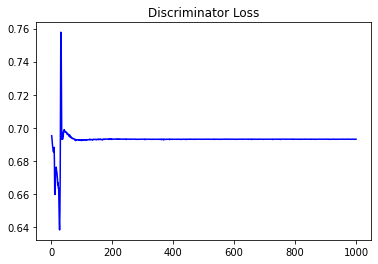

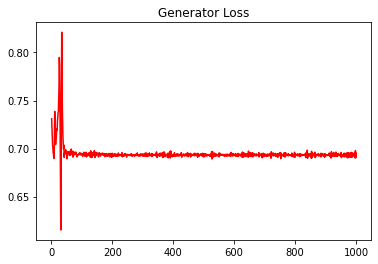

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12797891528181068


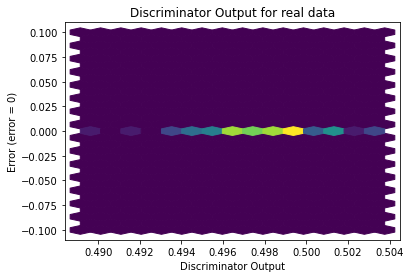

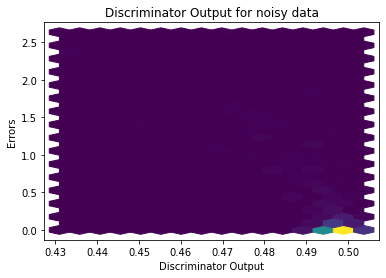

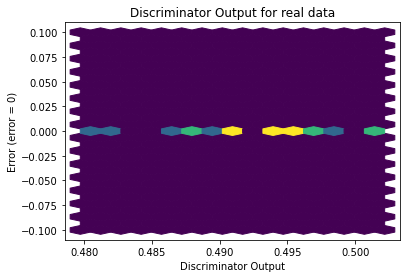

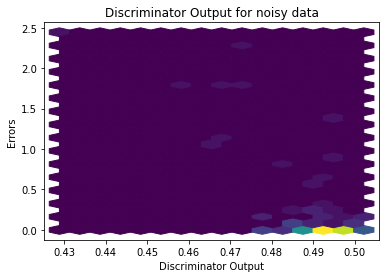

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


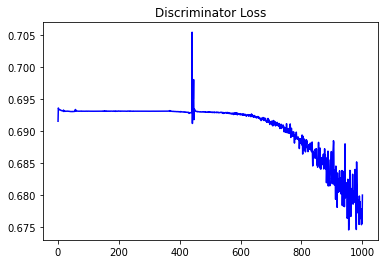

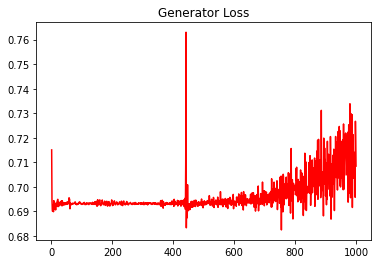

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1038360157698977


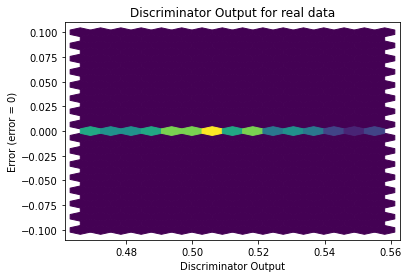

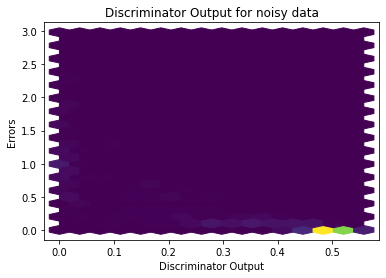

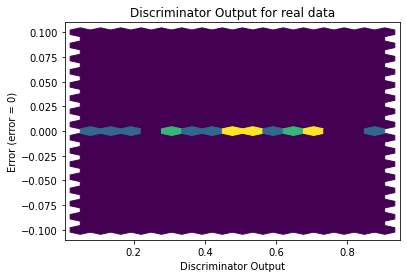

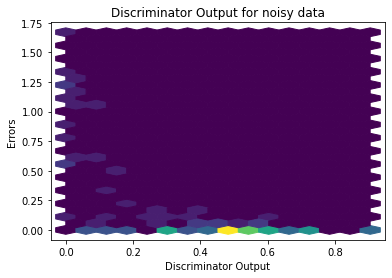

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
